<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data">Breast Cancer Wisconsin (Diagnostic)</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer_logo.png" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer.png" width="512">
</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'>Les variables sont calculées à partir d'une image numérisée d'une ponction d'aspiration à l'aiguille fine (FNA) utilisée pour obtenir des échantillons à partir de ganglions lymphatique. Elles décrivent les caractéristiques des noyaux cellulaires présents sur l'image.</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

# Outils projet

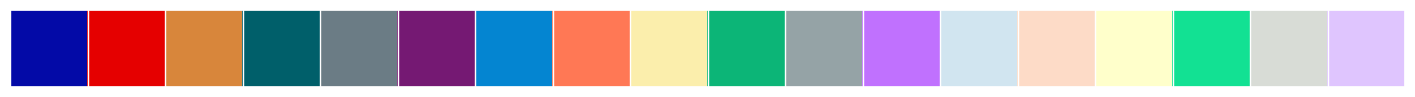

In [2]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score

In [4]:
from sklearn.preprocessing import LabelEncoder

# La lecture de l'échantillon initial

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonInitial.png" width="800">

In [5]:
nomsDiag = {'M':1,'B':0}
nomsDiagInv = {1:'M',0:'B'}
breastCancer = pd.read_csv('../donnees/Breast Cancer Wisconsin (Diagnostic)/breastCancer.csv', index_col='id').drop(columns='Unnamed: 32')
breastCancer.diagnosis = breastCancer.diagnosis.apply(lambda x : nomsDiag[x])
breastCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

In [6]:
boxCox  = PowerTransformer(method='box-cox')
X = breastCancer.drop(columns='diagnosis')
y = breastCancer.diagnosis
X = boxCox.fit(X+1).transform(X+1)

X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

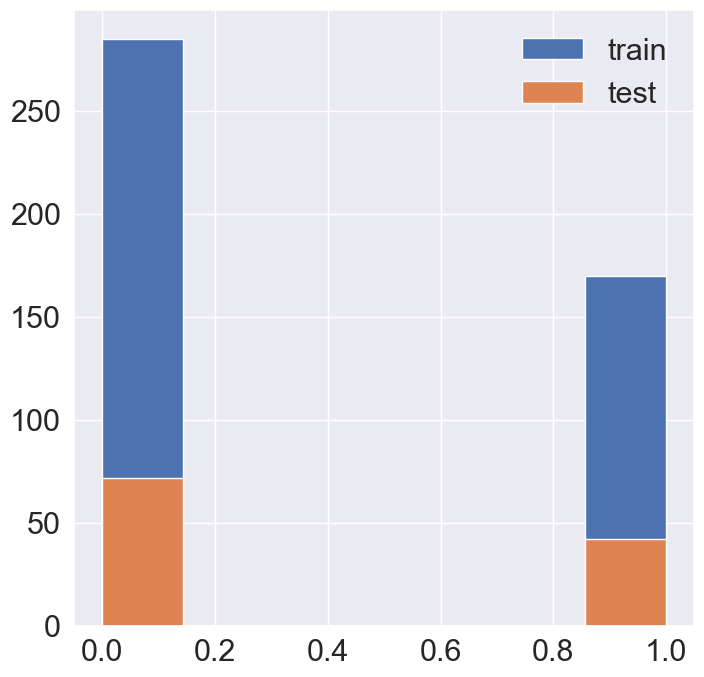

In [7]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();

# Déclaration du classificateur

In [8]:
clf = SVC(kernel="linear",C=0.025,probability=True)

# Entrainement du classificateur

In [9]:
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9824561403508771


# Inférence (prédiction) sur le jeu de données test

In [10]:
print(clf.score(X_test, y_test))
probas = clf.predict_proba(X_test)
pred   = clf.predict(X_test) # 50%


0.9824561403508771


# La courbe ROC (Receiver Operating Caracteristic)

L'aire sous la courbe ROC : 0.99404762 
Score de prédiction à 50% : 0.98245614


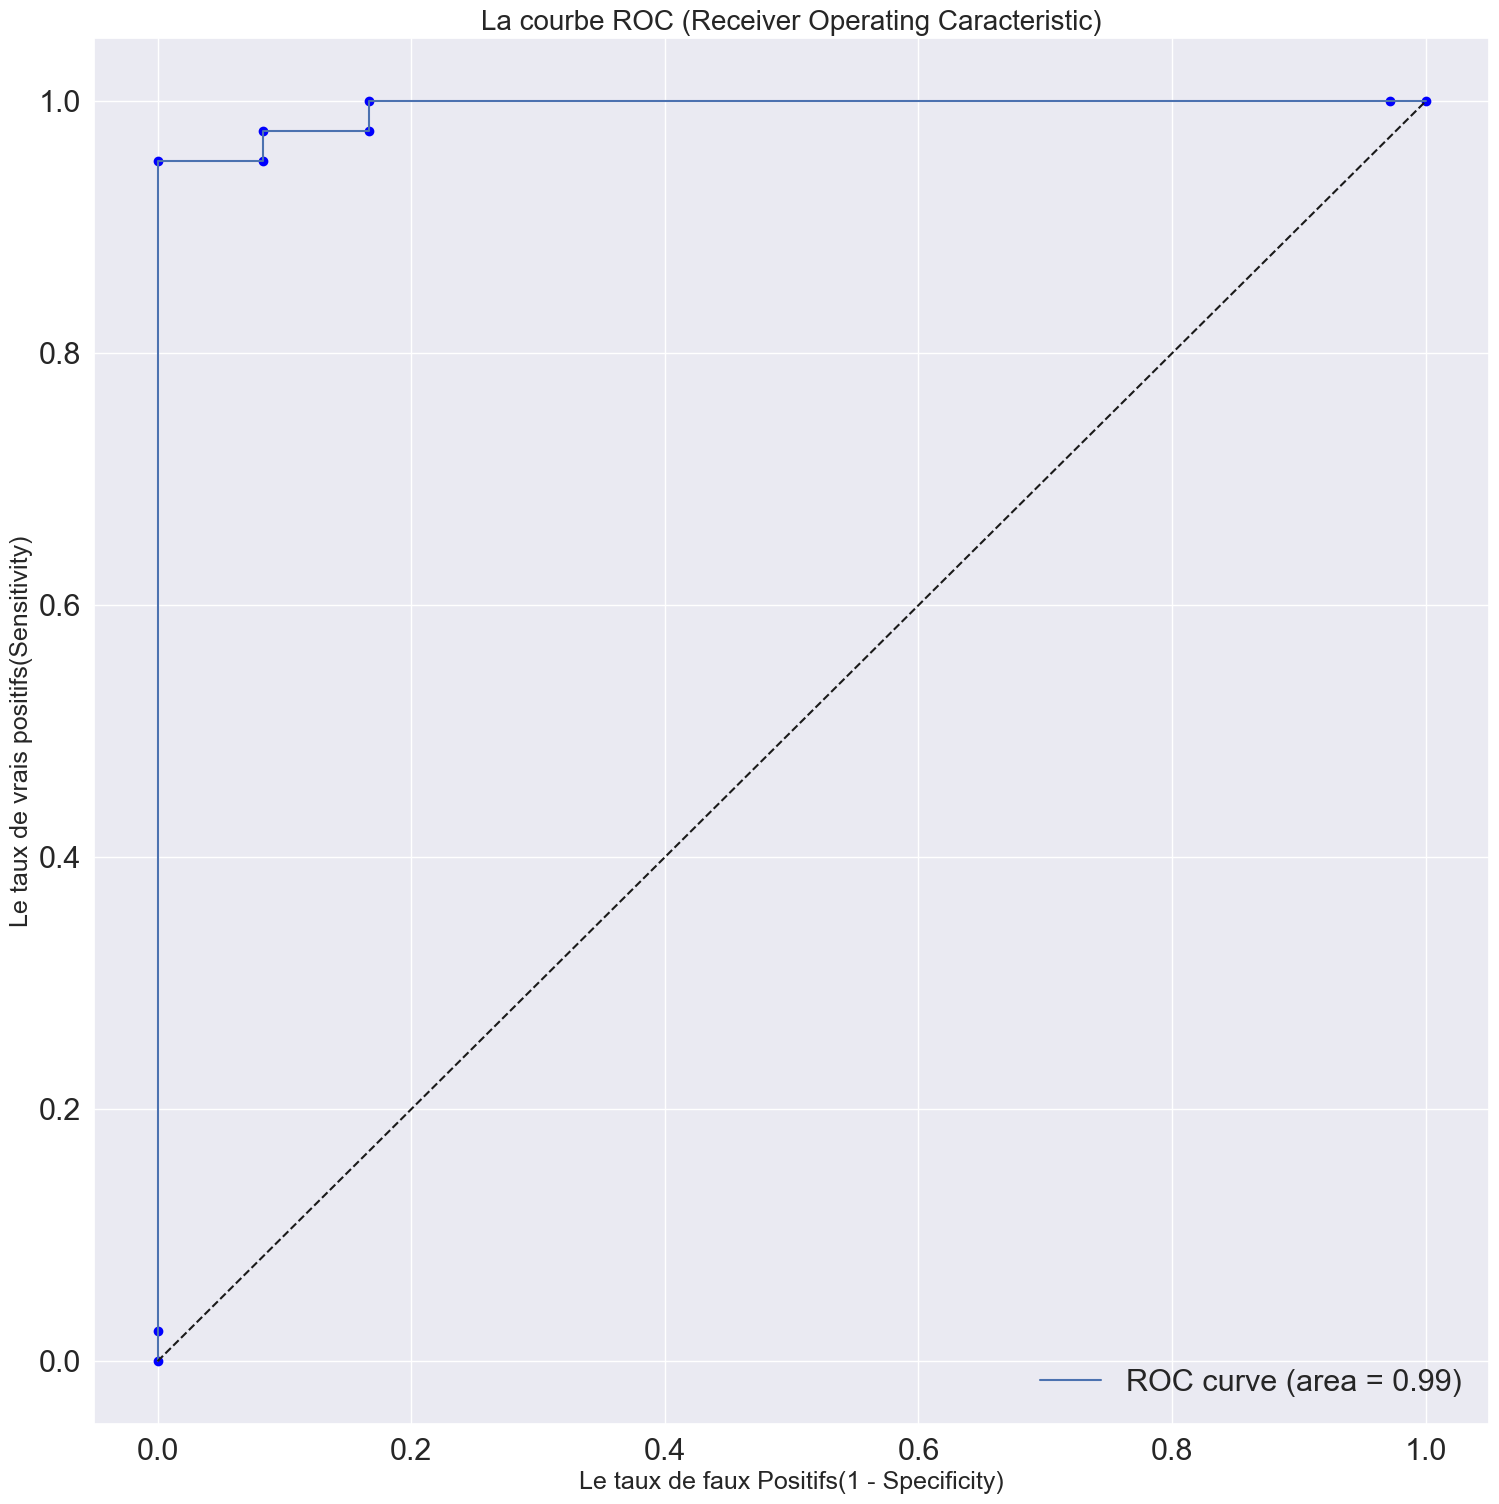

In [11]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(), probas[:, 1])


roc_auc = auc(fpr, tpr)
print ("L'aire sous la courbe ROC : %.8f \nScore de prédiction à 50%% : %.8f" % (roc_auc,clf.score(X_test, y_test)))

plt.figure(figsize=(18, 18))
plt.scatter(fpr, tpr, color='blue')
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## Le tableau des résultats 

In [12]:
print(X_test.shape)
dfROC = pd.DataFrame({'Probabilite':probas[:,1],
                      'Observation':y_test.ravel(),
                      'Prediction':0
                    }).sort_values(by='Probabilite',ascending=False)
dfROC.head(10)

(114, 30)


,Probabilite,Observation,Prediction
67,1.0,1,0
55,1.0,1,0
112,1.0,1,0
11,1.0,1,0
24,1.0,1,0
39,1.0,1,0
75,1.0,1,0
100,1.0,1,0
22,1.0,1,0
92,1.0,1,0


In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.DataFrame(probas,columns=['bénin', 
                             'malin']).sort_values(by ='malin',ascending=False)

,bénin,malin
67,3.650413e-12,1.000000e+00
55,2.526481e-10,1.000000e+00
112,5.455594e-10,1.000000e+00
11,1.775727e-09,1.000000e+00
24,2.865787e-09,1.000000e+00
39,3.155003e-09,1.000000e+00
75,3.636156e-09,1.000000e+00
100,6.774969e-09,1.000000e+00
22,8.174182e-09,1.000000e+00
92,3.852691e-08,1.000000e+00


## Prédiction à 50%

In [14]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .5 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,71,2
1,1,40


## Prédiction à 68,66%

In [15]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .686613 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,72,3
1,0,39


## Prédiction à 11,48%

In [16]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .114893 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,59,0
1,13,42
